In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df = pd.read_csv("/content/drive/MyDrive/Social Media/dummy_data.csv")
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [7]:
# Check for missing data
(df.isna().sum() / len(df)) * 100

age             0.0
gender          0.0
time_spent      0.0
platform        0.0
interests       0.0
location        0.0
demographics    0.0
profession      0.0
income          0.0
indebt          0.0
isHomeOwner     0.0
Owns_Car        0.0
dtype: float64

In [62]:
# Check the data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1000 non-null   int64   
 1   gender        1000 non-null   object  
 2   time_spent    1000 non-null   category
 3   platform      1000 non-null   object  
 4   interests     1000 non-null   object  
 5   location      1000 non-null   object  
 6   demographics  1000 non-null   object  
 7   profession    1000 non-null   object  
 8   income        1000 non-null   int64   
 9   indebt        1000 non-null   object  
 10  isHomeOwner   1000 non-null   object  
 11  Owns_Car      1000 non-null   object  
dtypes: category(1), int64(2), object(9)
memory usage: 87.4+ KB


# Analyzation

In [16]:
pd.pivot_table(df, columns = ["interests"], index = ["platform"], values = ["time_spent"], aggfunc = np.mean).style.background_gradient(axis = 0)

In [14]:
pd.pivot_table(df, columns = ["profession"], index = ["gender"], values = ["time_spent"], aggfunc = np.mean).style.background_gradient(axis = 0)

In [17]:
pd.pivot_table(df, columns = ["location"], index = ["demographics"], values = ["time_spent"], aggfunc = np.mean).style.background_gradient(axis = 0)

# EDA

Text(0.5, 0.98, 'Distribution for Time Spent on Social Media')

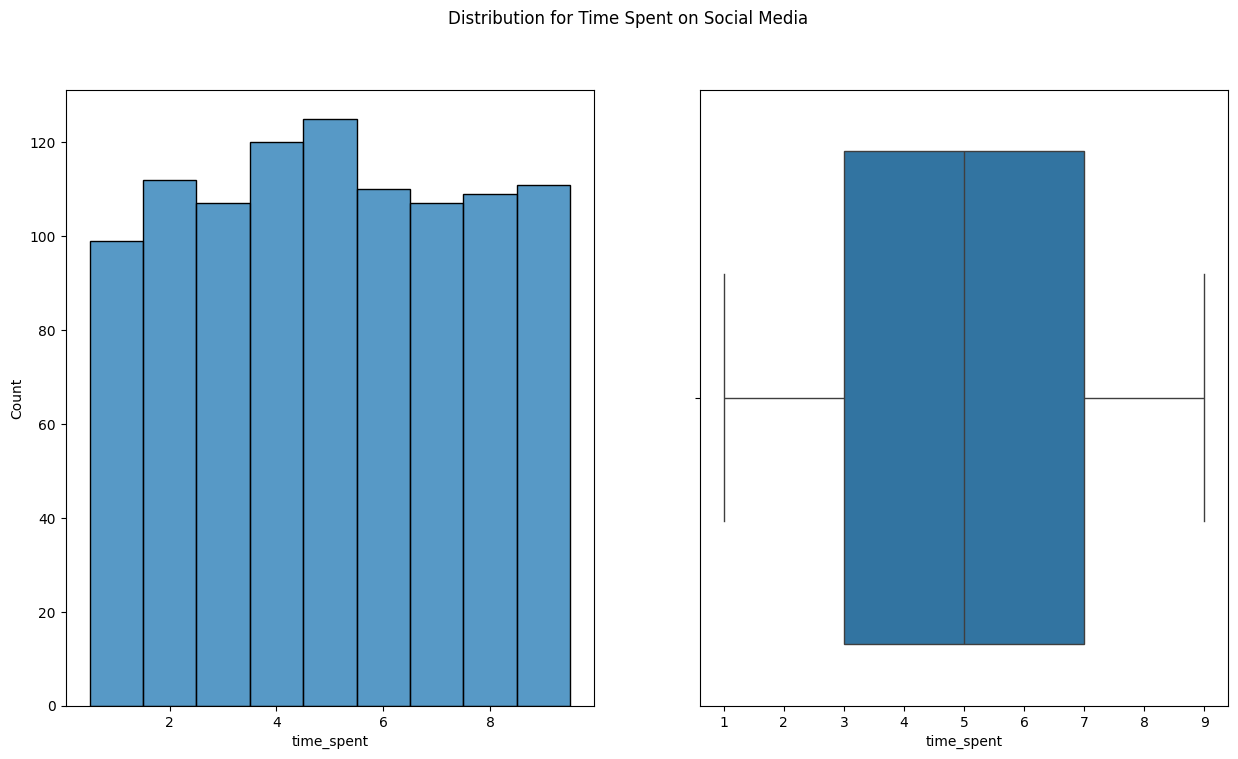

In [32]:
fig , axes = plt.subplots(1,2, figsize = (15, 8))
sns.histplot(df, x = "time_spent", bins = 10, ax = axes[0])
sns.boxplot(df[["time_spent"]].astype("category"), x = "time_spent", ax = axes[1])
plt.suptitle("Distribution for Time Spent on Social Media")


In [27]:
df["time_spent"] = df["time_spent"].astype("category")

Text(0.5, 1.0, 'Time Spent by Platforms')

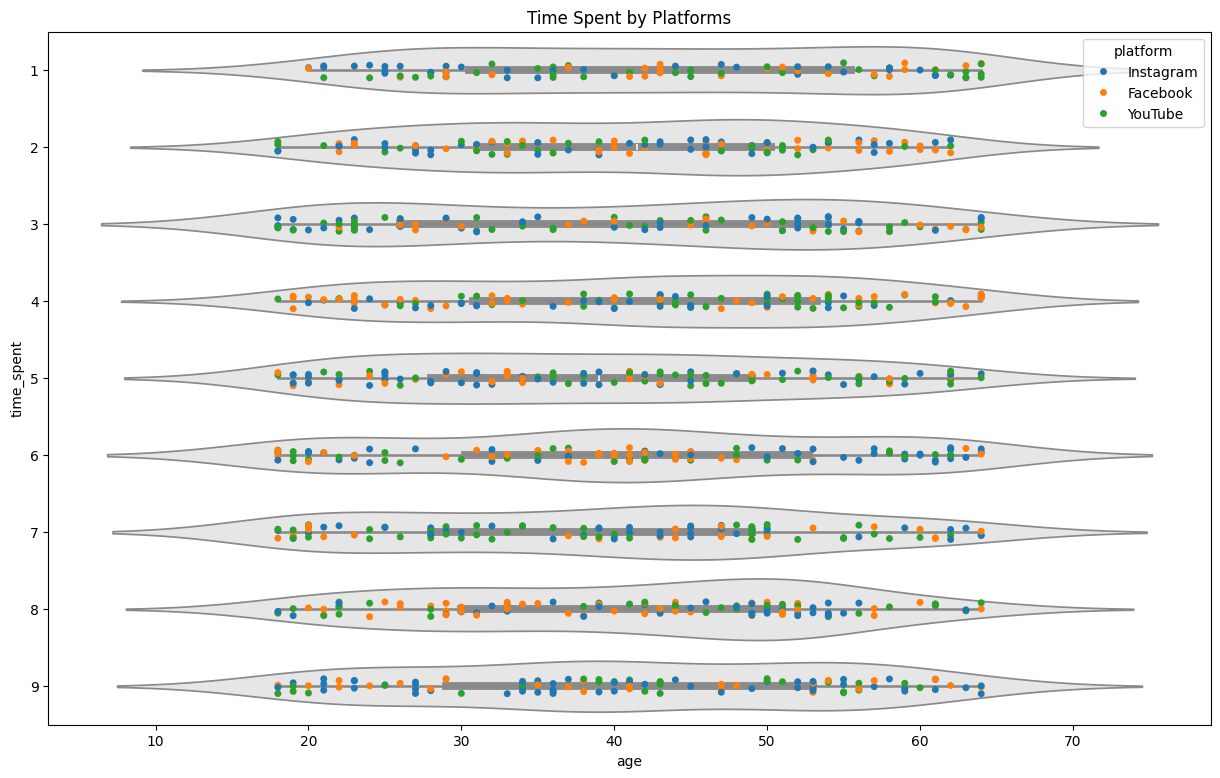

In [55]:
plt.figure(figsize = (15, 9))
sns.violinplot(df, y = "time_spent",  x = "age", color = "0.9")
sns.stripplot(df, y = 'time_spent', x = "age", hue = "platform")
plt.title("Time Spent by Platforms")

<Axes: xlabel='time_spent', ylabel='income'>

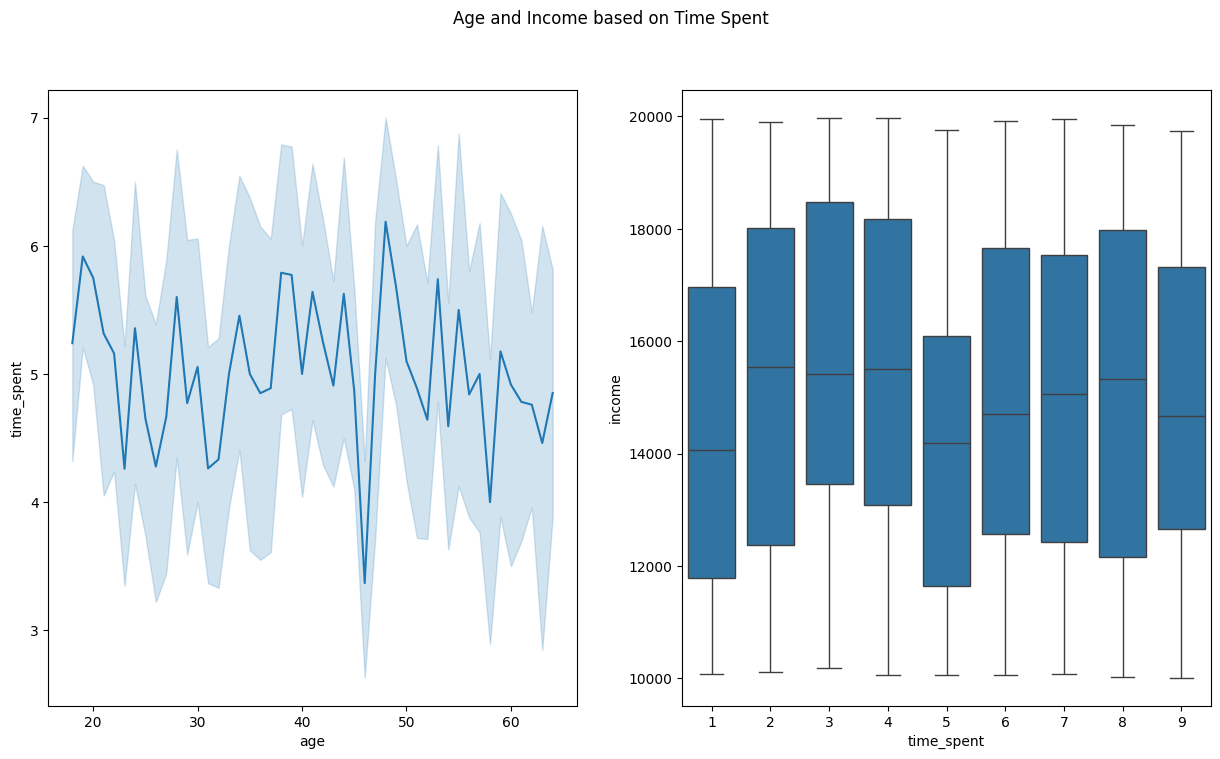

In [69]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
plt.suptitle("Age and Income based on Time Spent")
sns.lineplot(df, x = "age", y = "time_spent", ax = axes[0])
sns.boxplot(df, x = "time_spent", y = "income", ax = axes[1])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 3000x1600 with 0 Axes>

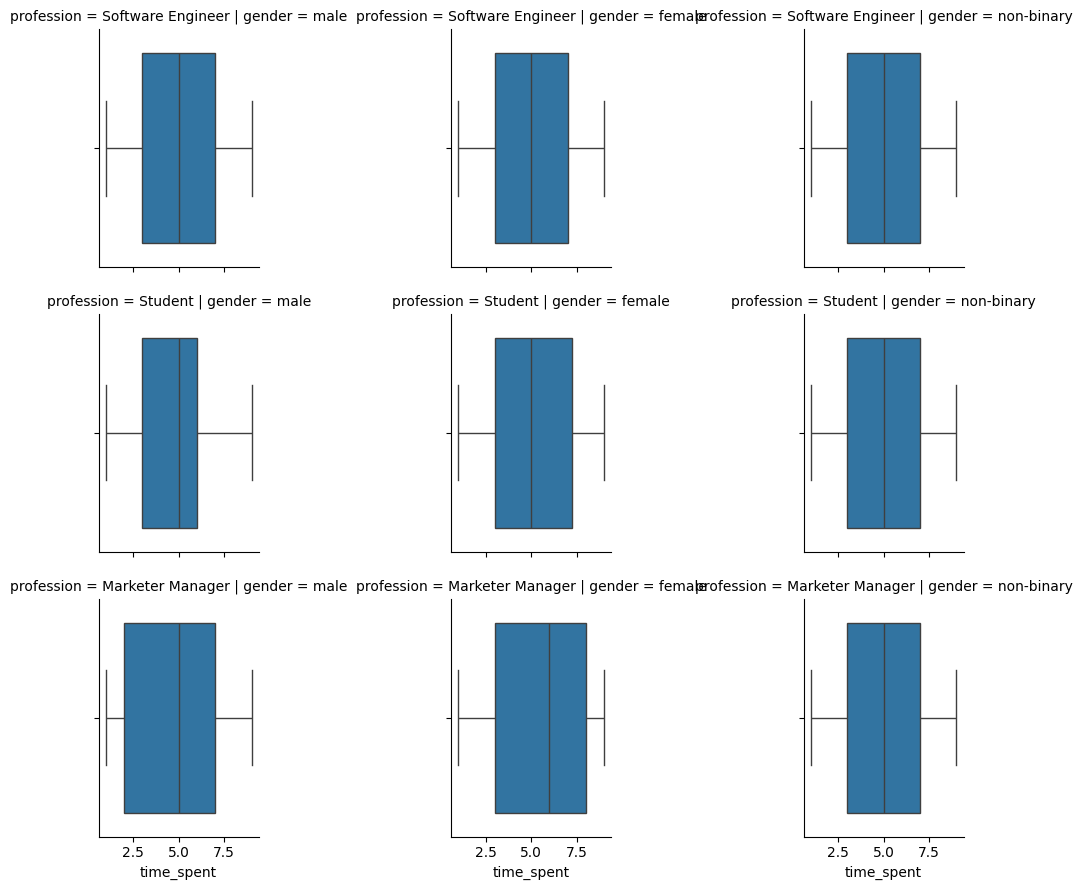

In [56]:
plt.figure(figsize = (15, 8), dpi = 200)
g = sns.FacetGrid(df, col = "gender", row = "profession")
g.map(sns.boxplot, "time_spent")
g.figure.subplots_adjust(wspace=1.2, hspace=0.2)

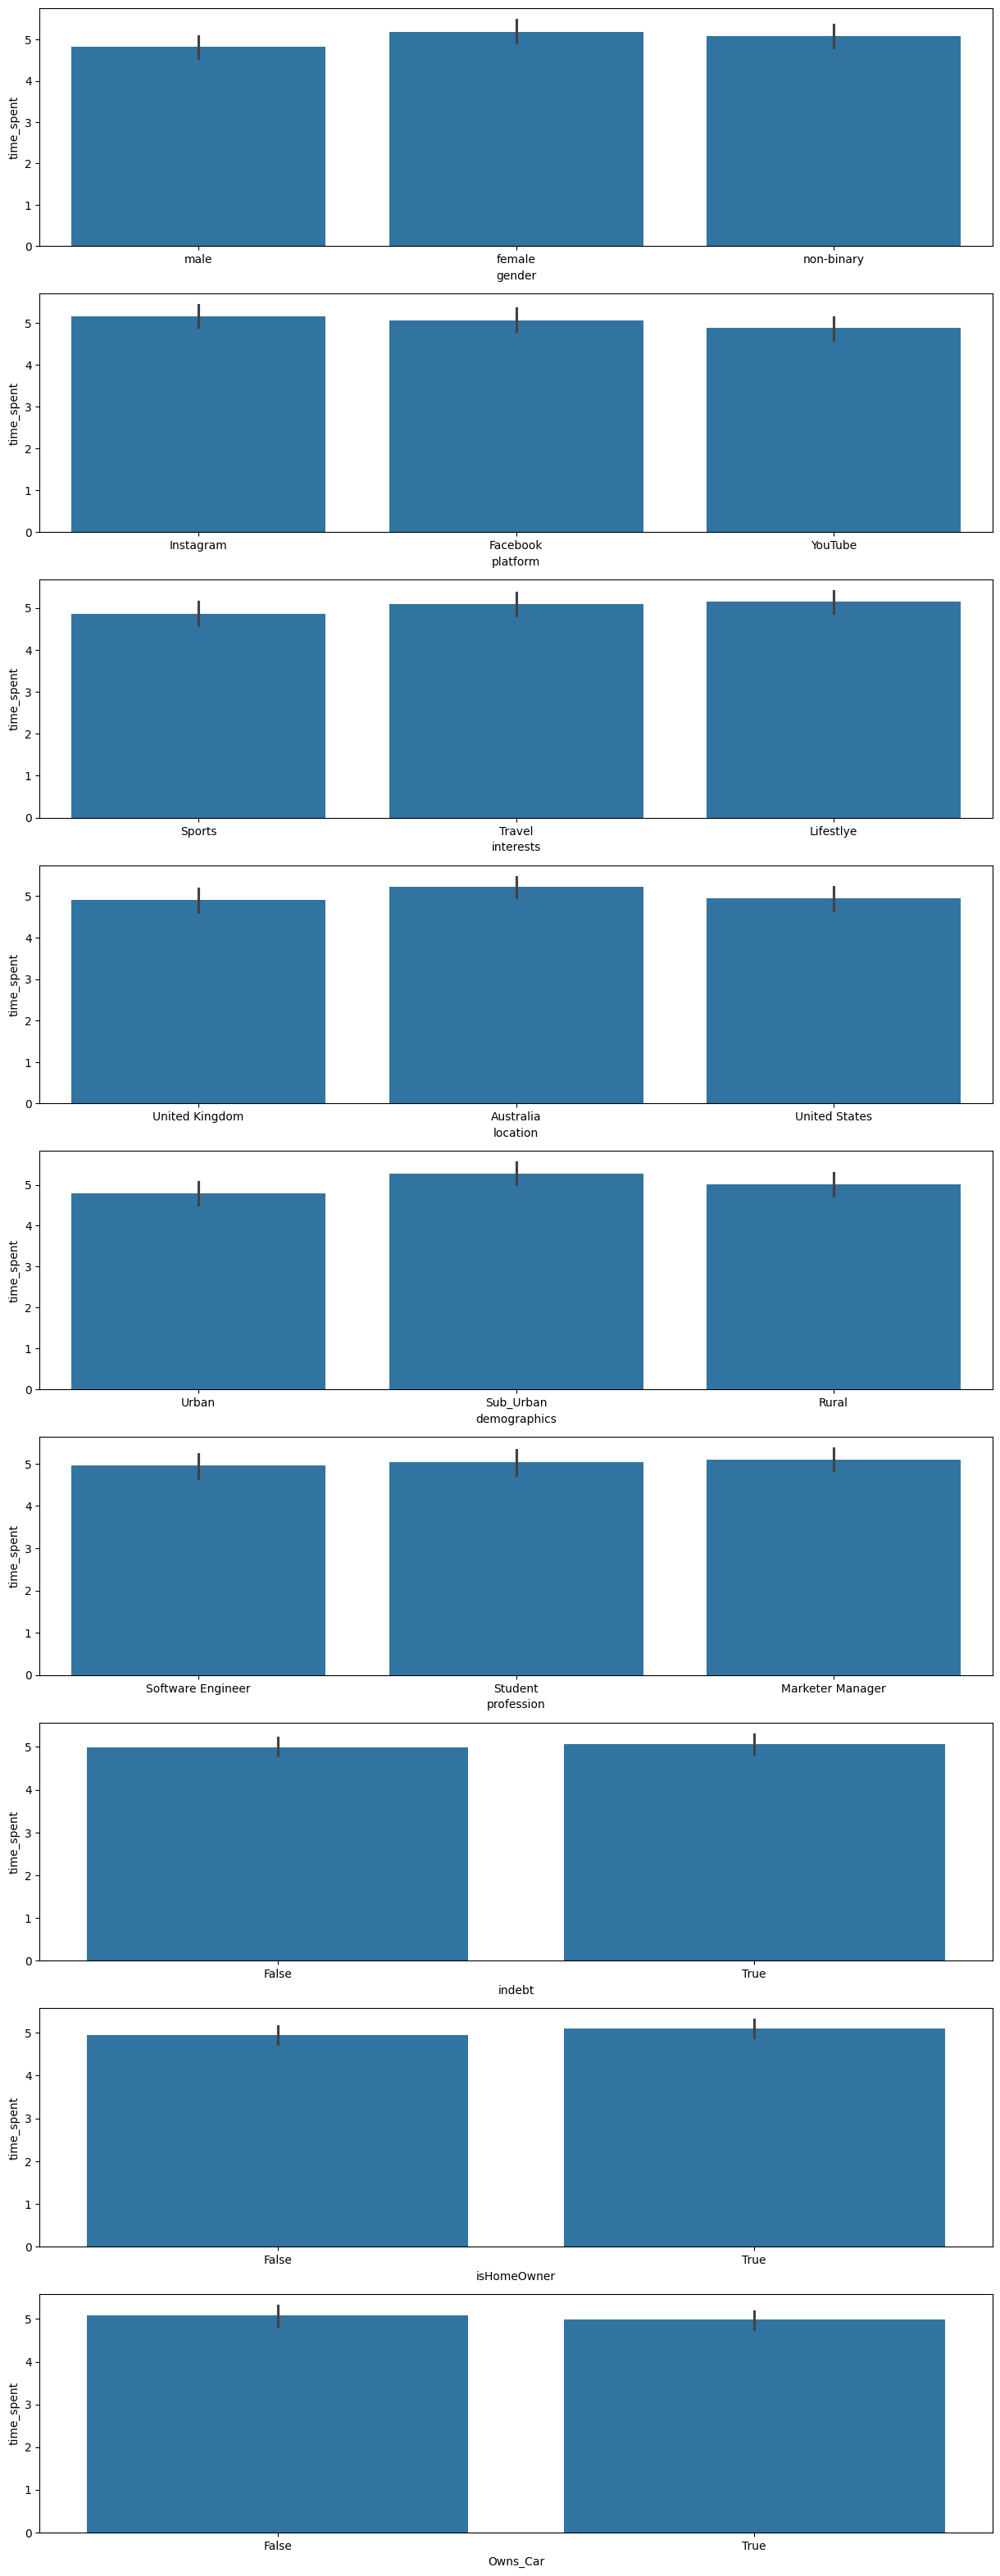

In [81]:
df["time_spent"] = df['time_spent'].astype(int)
bool_cols = df.select_dtypes(include = ["object"]).columns
fig, axes = plt.subplots(len(bool_cols), 1, figsize = (15, 40))
col = 0
for i in bool_cols:
  sns.barplot(df, x = i, y = "time_spent", ax = axes[col])
  col +=1


<Axes: xlabel='profession', ylabel='income'>

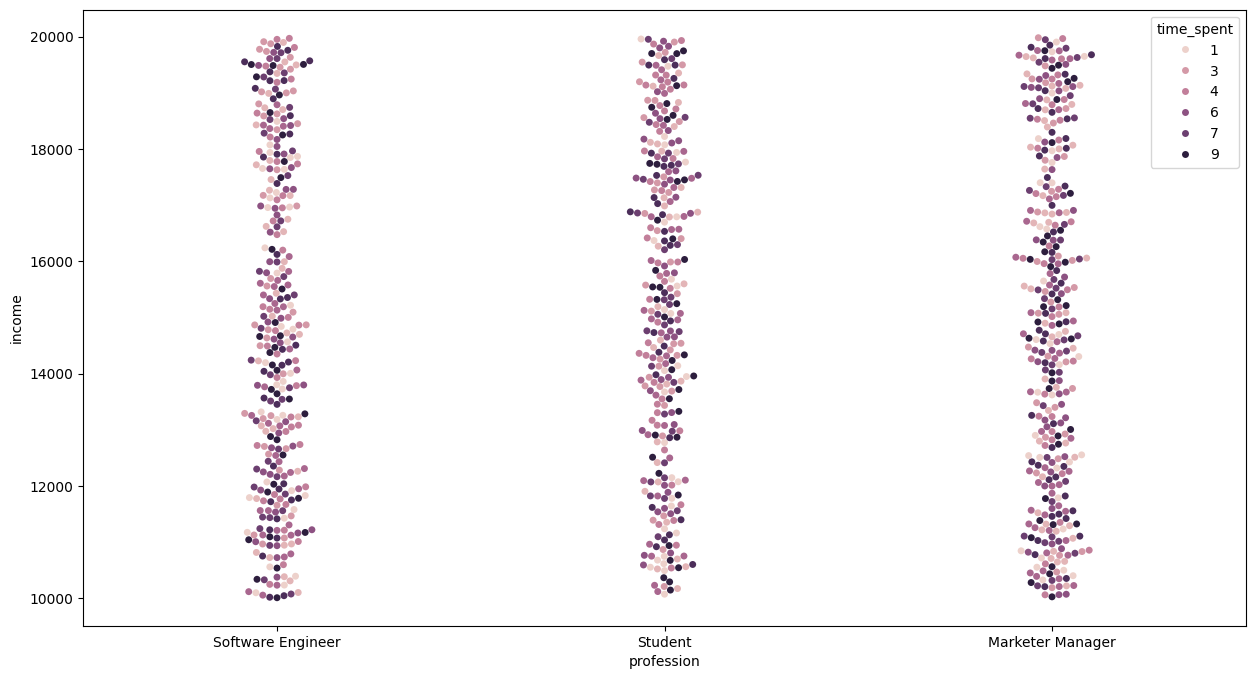

In [76]:
plt.figure(figsize = (15, 8))
sns.swarmplot(df, x = "profession", y = "income", hue = "time_spent")

<Axes: xlabel='profession', ylabel='age'>

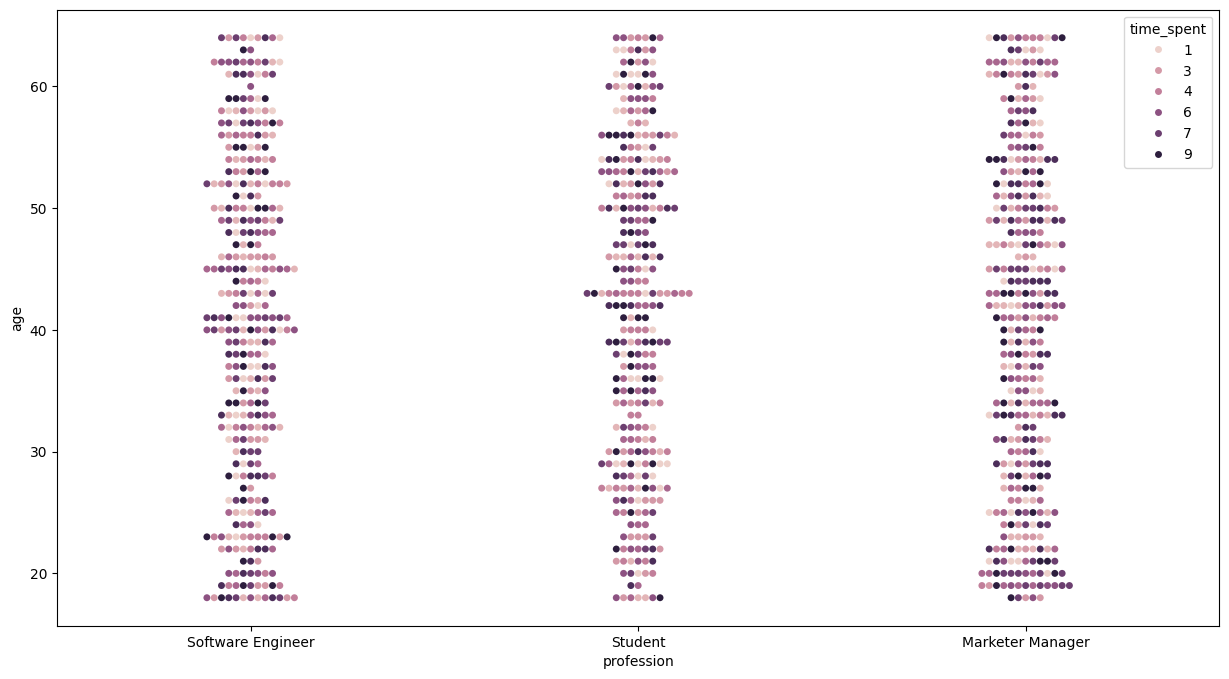

In [75]:
plt.figure(figsize = (15, 8))
sns.swarmplot(df, x = "profession", y = "age", hue = "time_spent")

<Axes: >

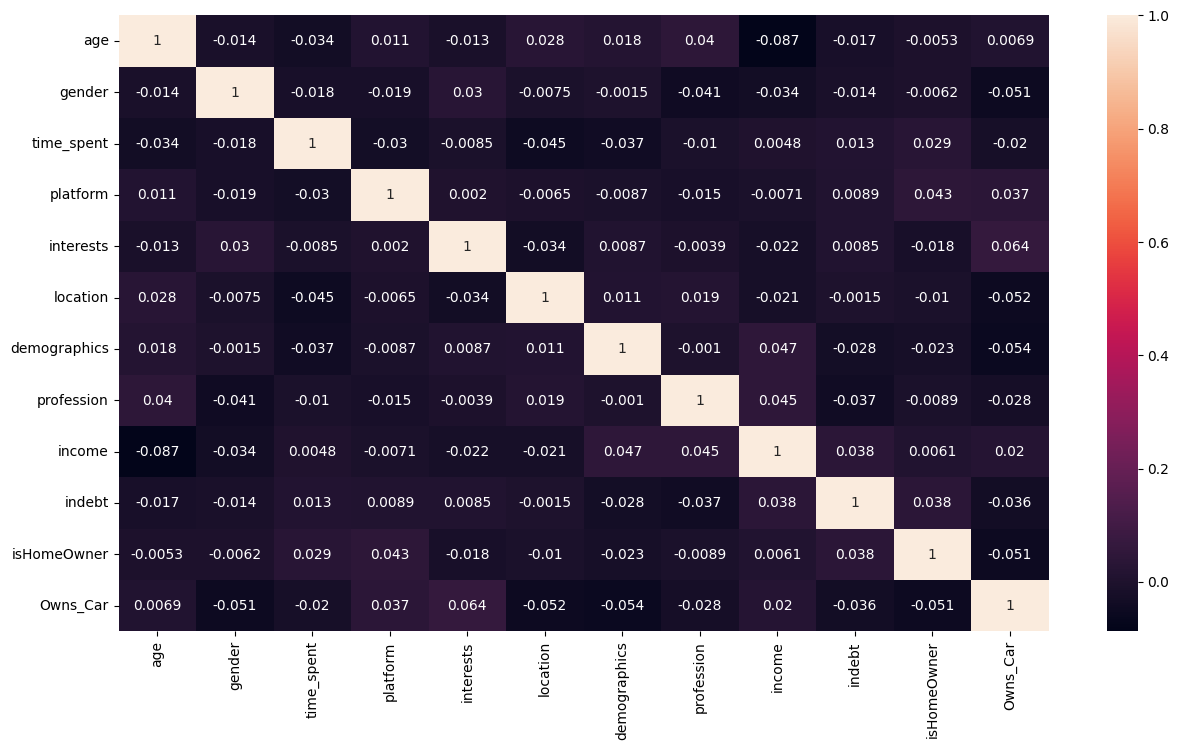

In [86]:
df_tmp = df.copy()
for i in df_tmp.columns:
  if pd.api.types.is_object_dtype(df_tmp[i]):
    df_tmp[i] = df_tmp[i].astype('category').cat.codes.astype(float)
plt.figure(figsize = (15, 8))
sns.heatmap(df_tmp.corr(), annot = True)
plt.title("Poor Correlation")

# Creating Predictive Model

In [126]:
# We might expect a low R-squred for this since the dependent variable is not correalted to the time_spent

# Preprocessing the data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder(sparse_output = False)
ordinal = OrdinalEncoder()
scaler = StandardScaler()


int_features = ["age", "income"]
bool_features = df.select_dtypes(include = bool).columns
category_features = df.select_dtypes(include = "object").columns

pipe1 = Pipeline([("one_hot", one_hot)])
pipe2 = Pipeline([("ordinal", ordinal)])
pipe3 = Pipeline([("scaler", scaler)])

preprocessor = ColumnTransformer([
    ("one_hot", pipe1, category_features),
    ("ordinal", pipe2, bool_features),
    ("scaler", pipe3, int_features)
], remainder = "passthrough")

In [128]:
# splitting the data
from sklearn.model_selection import train_test_split
X = df.drop('time_spent', axis = 1)
y = df.time_spent

transformed_X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size = 0.3, random_state = 42)


In [142]:
# Model Creation
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Model 1

rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train, y_train)
print(f"R2-Square-RFR:{rfr.score(X_test, y_test)}")

# Model 2
dtr = DecisionTreeRegressor(max_depth = 50)
abr = AdaBoostRegressor(estimator=dtr, n_estimators = 100, learning_rate = 0.01)
abr.fit(X_train, y_train)
print(f"R2-Squared-ABR: {abr.score(X_test, y_test)}")

# Model 3
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"R2-Squared-LR: {lr.score(X_test, y_test)}")

R2-Square-RFR:-0.07043784739767545
R2-Squared-ABR: -0.22081859525012626
R2-Squared-LR: -0.034452332803972974


In [194]:
# Looks Like Regression Will Not Work on our target variable so where gonna make it a classification
df.loc[df["time_spent"] <= 5, "target"] = "0"
df.loc[df["time_spent"]>5, "target"] = "1"
df.drop("time_spent", axis = 1, inplace = True)
df["target"] = df["target"].astype(int)

Text(0.5, 1.0, 'Poor Correlation')

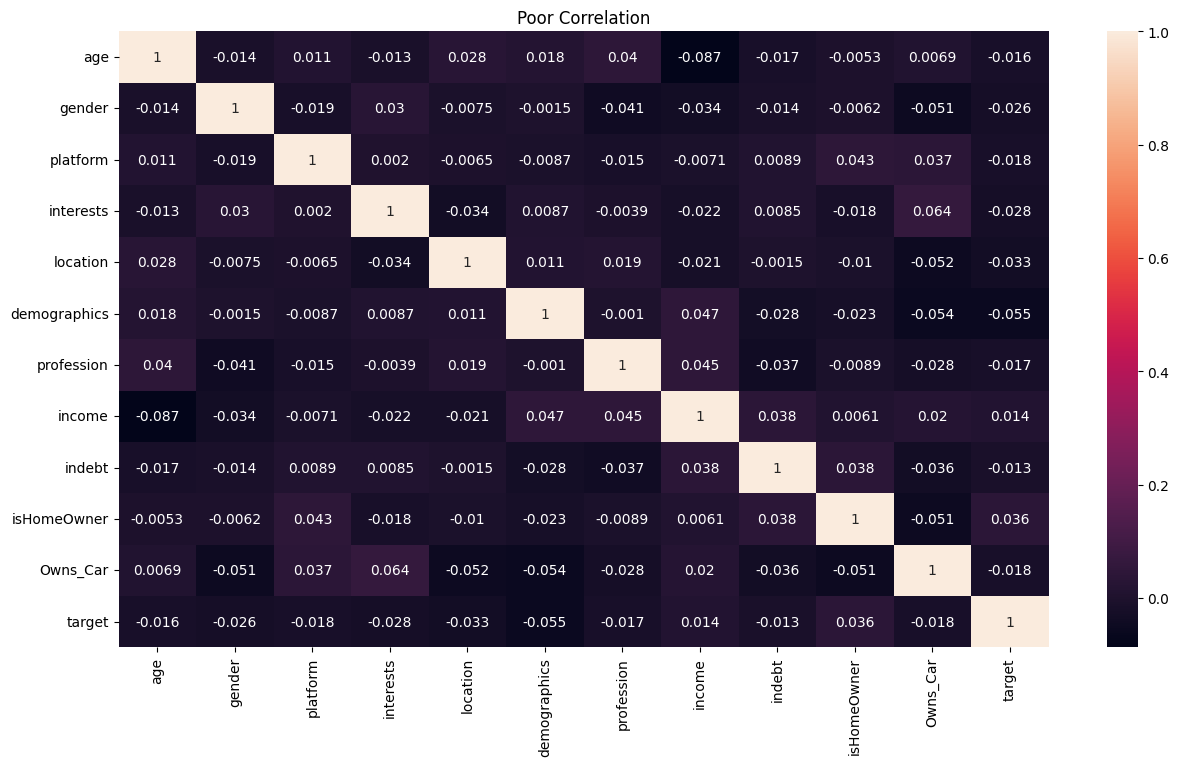

In [195]:
df_tmp = df.copy()
for i in df_tmp.columns:
  if pd.api.types.is_object_dtype(df_tmp[i]):
    df_tmp[i] = df_tmp[i].astype('category').cat.codes.astype(float)
plt.figure(figsize = (15, 8))
sns.heatmap(df_tmp.corr(), annot = True)
plt.title("Poor Correlation")

In [198]:
X = df.drop("target", axis = 1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)
X_train, X_test = preprocessor.fit_transform(X_train), preprocessor.transform(X_test)

In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [295]:
from sklearn.metrics import accuracy_score, precision_score as precision, recall_score as recall, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
estimators = np.arange(100, 1100, 100)
accuracy = []
precisions = []
recalls = []

for i in estimators:
  rfc_num = RandomForestClassifier(n_estimators = i)
  rfc.fit(X_train, y_train)
  prediction = rfc.predict(X_test)
  accuracy.append(accuracy_score(y_test,prediction))
  precisions.append(precision(y_test, prediction))
  recalls.append(recall(y_test, prediction))


[Text(0.5, 1.0, 'Recall'),
 Text(0.5, 0, 'N_Estimators'),
 Text(0, 0.5, 'Accuracy')]

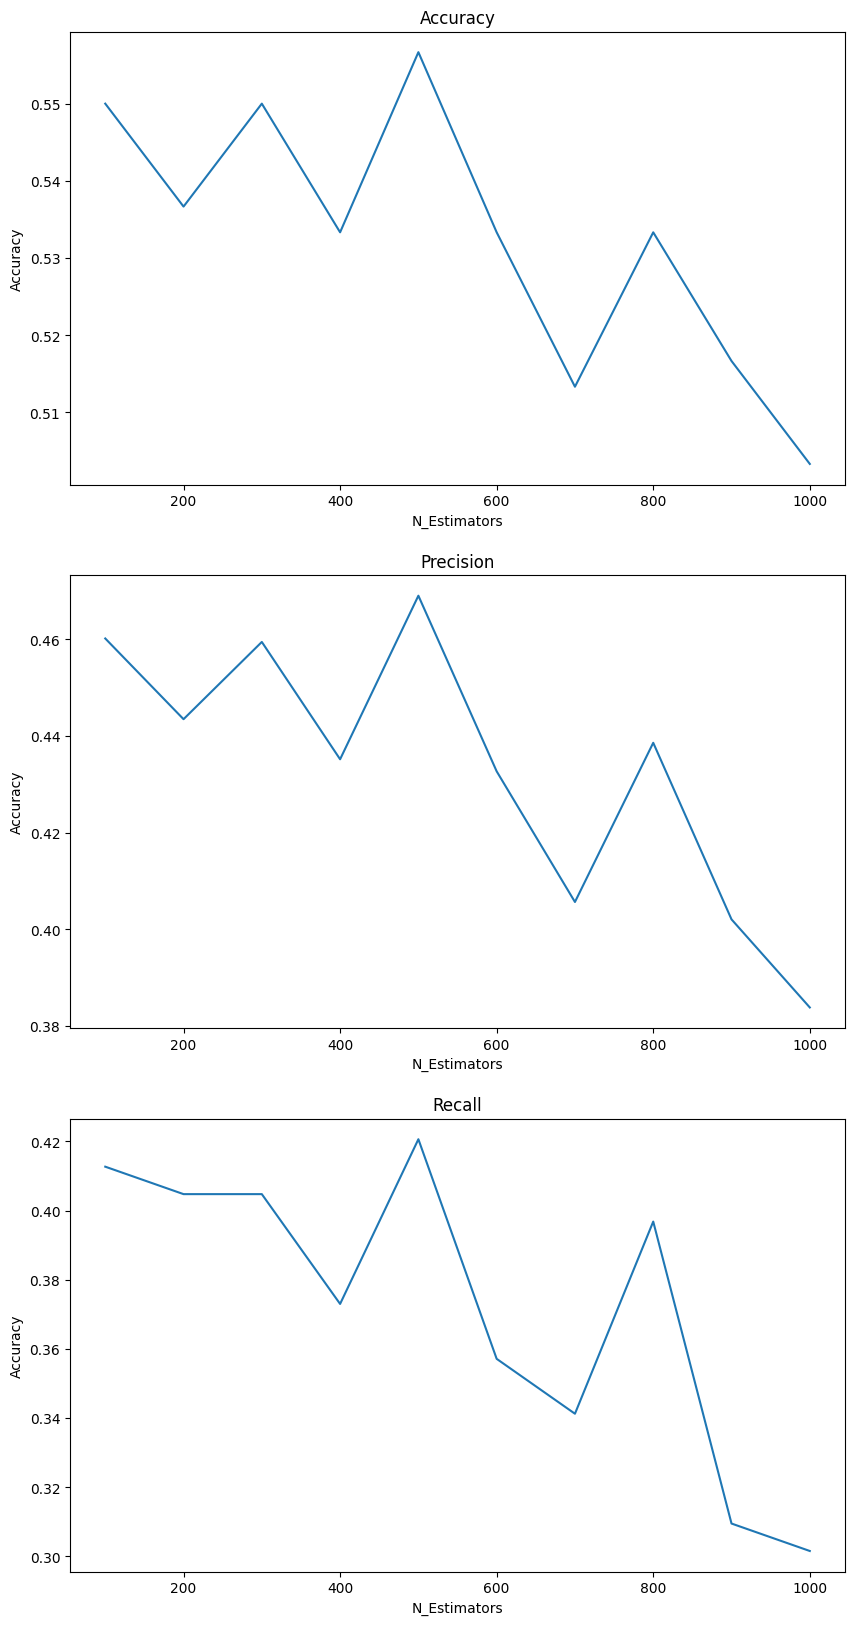

In [214]:
fig, axes =plt.subplots(3,1, figsize= (10, 20), dpi = 100)
axes[0].plot(estimators, accuracy)
axes[0].set(title = "Accuracy", xlabel = "N_Estimators", ylabel = 'Accuracy')

axes[1].plot(estimators, precisions)
axes[1].set(title = "Precision", xlabel = "N_Estimators", ylabel = 'Accuracy')

axes[2].plot(estimators, recalls)
axes[2].set(title = "Recall", xlabel = "N_Estimators", ylabel = 'Accuracy')

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       174
           1       0.43      0.37      0.40       126

    accuracy                           0.53       300
   macro avg       0.51      0.51      0.50       300
weighted avg       0.52      0.53      0.52       300



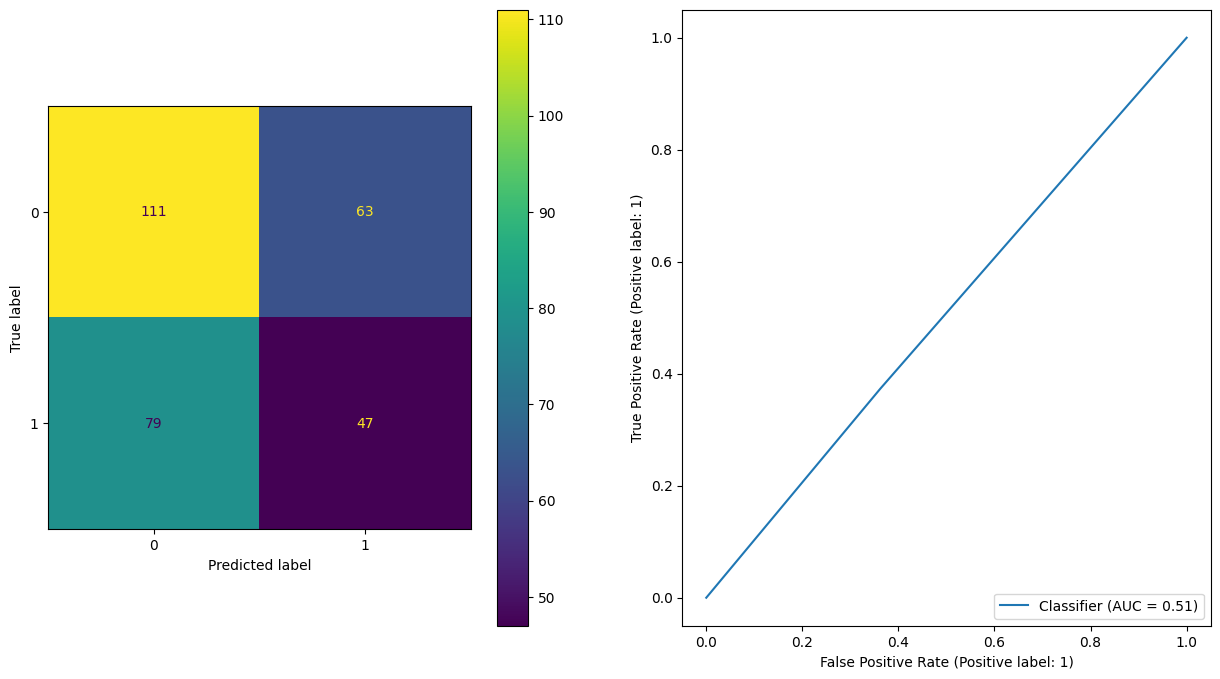

In [298]:
rfc_preds = rfc.predict(X_test)
print(classification_report(y_test, rfc_preds))
fig, axes = plt.subplots(1,2, figsize = (15, 8))
ConfusionMatrixDisplay.from_predictions(y_test,rfc_preds, ax = axes[0])
RocCurveDisplay.from_predictions(y_test,rfc_preds, ax = axes[1])

Text(0.5, 1.0, 'Feature Importances')

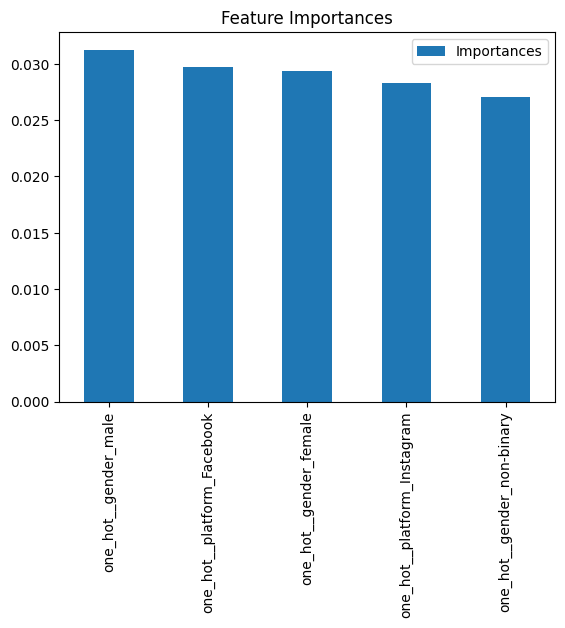

In [292]:
pd.DataFrame(rfc.feature_importances_, index = preprocessor.get_feature_names_out(), columns = ["Importances"]).head().sort_values("Importances", ascending = False).plot(kind = "bar")
plt.title('Feature Importances')

In [237]:
# KNN
n_neighbors = np.arange(1, 30)
accuracy = []
precisions = []
recalls = []

for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  prediction = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test,prediction))
  precisions.append(precision(y_test, prediction))
  recalls.append(recall(y_test, prediction))

[Text(0.5, 1.0, 'Recall'), Text(0.5, 0, 'N_Neighbors'), Text(0, 0.5, 'Recall')]

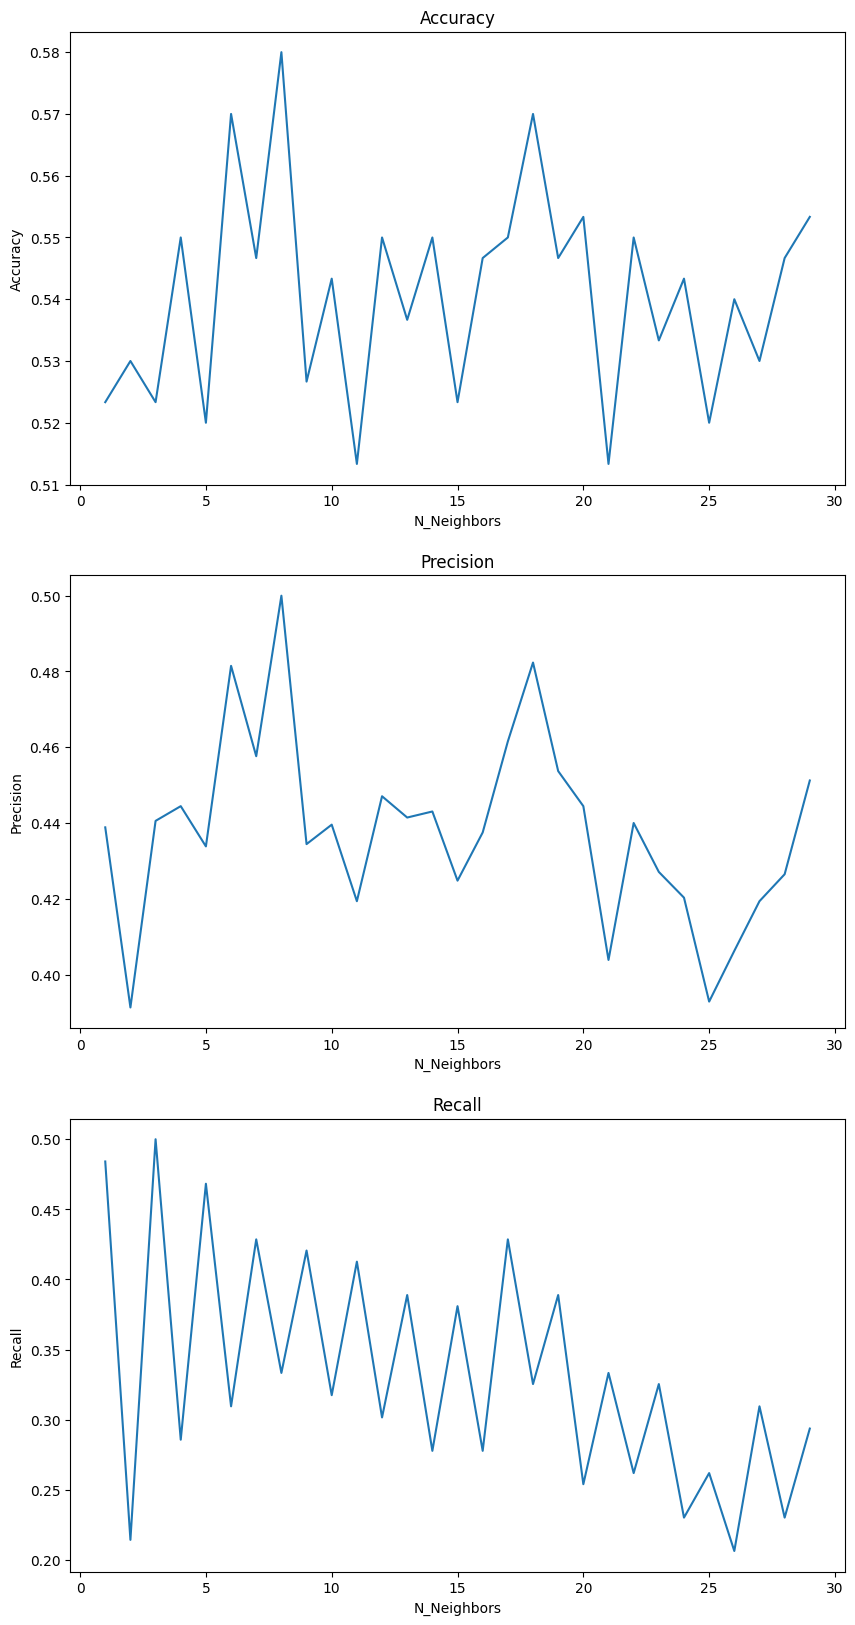

In [241]:
fig, axes =plt.subplots(3,1, figsize= (10, 20), dpi = 100)
axes[0].plot(n_neighbors, accuracy)
axes[0].set(title = "Accuracy", xlabel = "N_Neighbors", ylabel = 'Accuracy')

axes[1].plot(n_neighbors, precisions)
axes[1].set(title = "Precision", xlabel = "N_Neighbors", ylabel = 'Precision')

axes[2].plot(n_neighbors, recalls)
axes[2].set(title = "Recall", xlabel = "N_Neighbors", ylabel = 'Recall')

              precision    recall  f1-score   support

           0       0.59      0.74      0.66       174
           1       0.45      0.29      0.36       126

    accuracy                           0.55       300
   macro avg       0.52      0.52      0.51       300
weighted avg       0.53      0.55      0.53       300



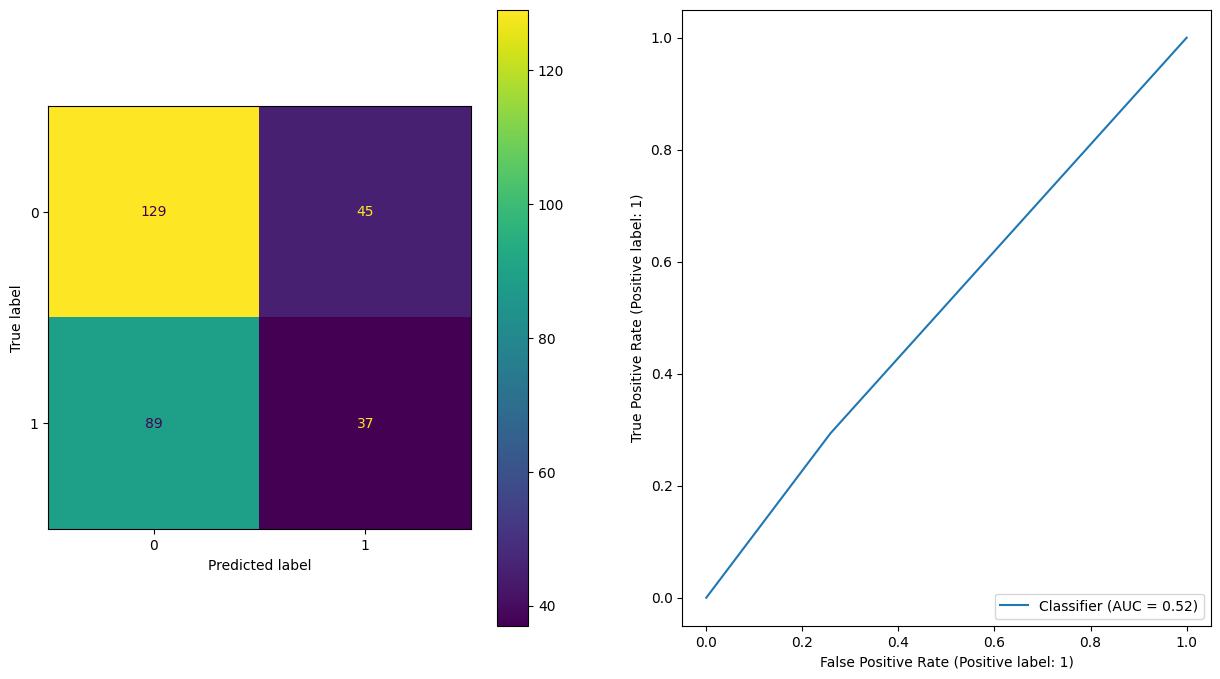

In [300]:
knn_preds = knn.predict(X_test)
print(classification_report(y_test, knn_preds))
fig, axes = plt.subplots(1,2, figsize = (15, 8))
ConfusionMatrixDisplay.from_predictions(y_test,knn_preds, ax = axes[0])
RocCurveDisplay.from_predictions(y_test,knn_preds, ax = axes[1])

In [283]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 10000)
tol = np.linspace(0, 2, 30)

accuracy = []
precisions = []
recalls = []

for i in tol:
  lr = LogisticRegression(max_iter = 100000, tol = i)
  lr.fit(X_train, y_train)
  prediction = lr.predict(X_test)
  accuracy.append(accuracy_score(y_test,prediction))
  precisions.append(precision(y_test, prediction))
  recalls.append(recall(y_test, prediction))

[Text(0.5, 1.0, 'Recall'), Text(0.5, 0, 'tol'), Text(0, 0.5, 'Recall')]

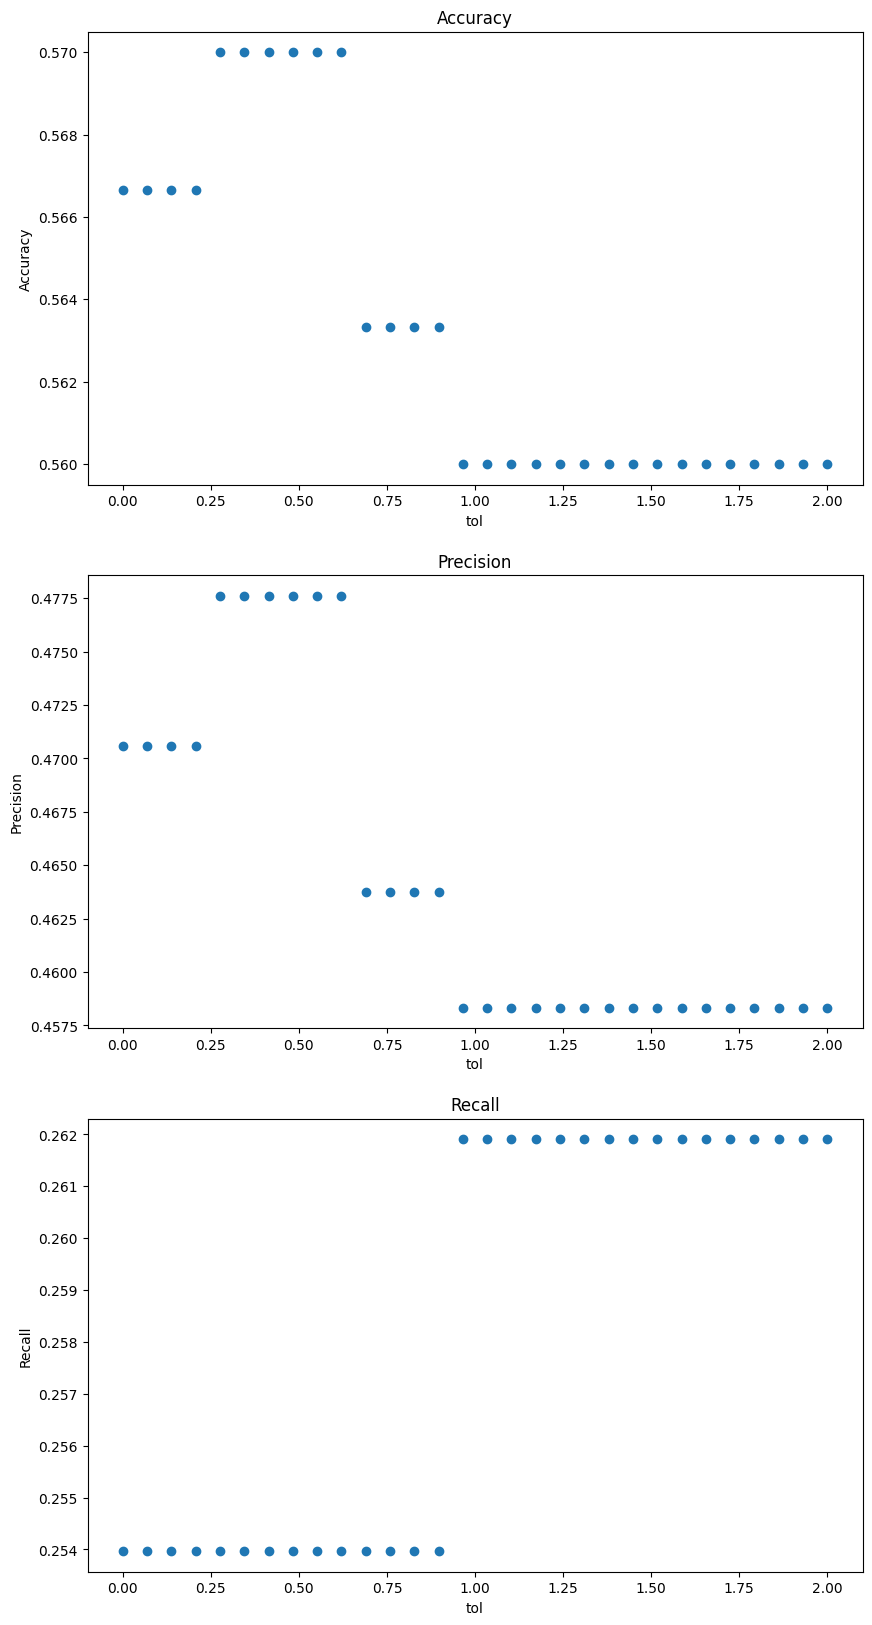

In [284]:
fig, axes =plt.subplots(3,1, figsize= (10, 20), dpi = 100)
axes[0].scatter(tol, accuracy)
axes[0].set(title = "Accuracy", xlabel = "tol", ylabel = 'Accuracy')

axes[1].scatter(tol, precisions)
axes[1].set(title = "Precision", xlabel = "tol", ylabel = 'Precision')

axes[2].scatter(tol, recalls)
axes[2].set(title = "Recall", xlabel = "tol", ylabel = 'Recall')

              precision    recall  f1-score   support

           0       0.59      0.78      0.67       174
           1       0.46      0.26      0.33       126

    accuracy                           0.56       300
   macro avg       0.53      0.52      0.50       300
weighted avg       0.54      0.56      0.53       300



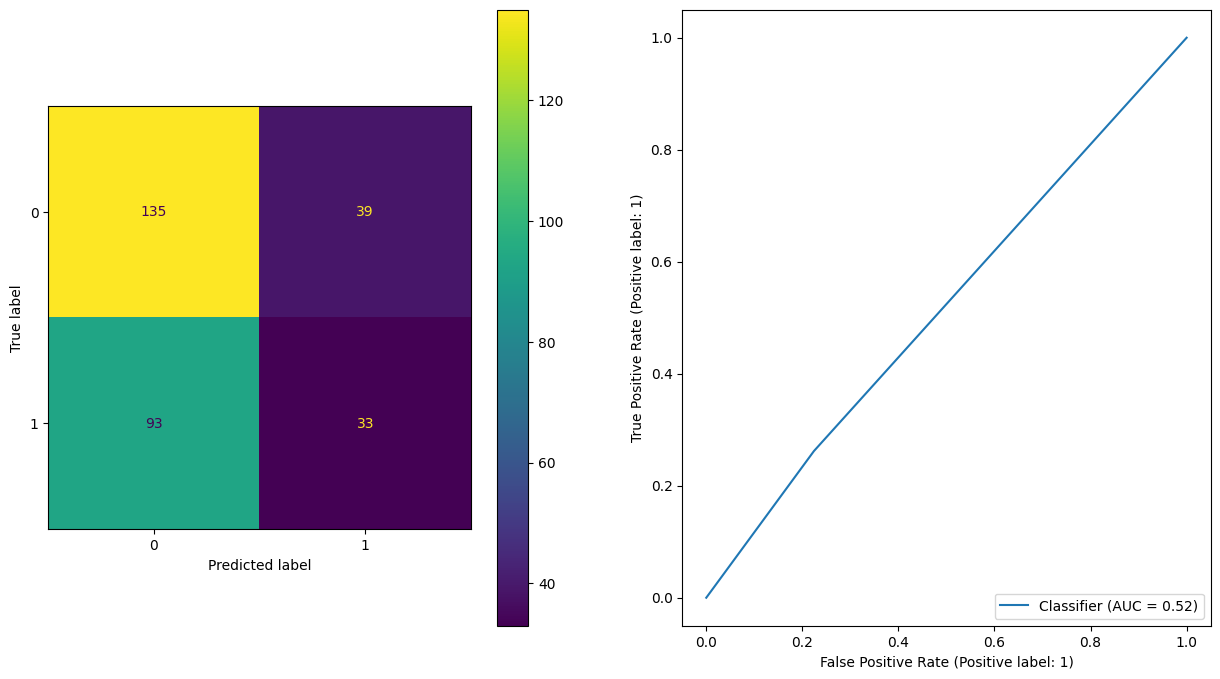

In [302]:
lr_preds = lr.predict(X_test)
print(classification_report(y_test, lr_preds))
fig, axes = plt.subplots(1,2, figsize = (15, 8))
ConfusionMatrixDisplay.from_predictions(y_test,lr_preds, ax = axes[0])
RocCurveDisplay.from_predictions(y_test,lr_preds, ax = axes[1])

Text(0.5, 1.0, 'Coefficient')

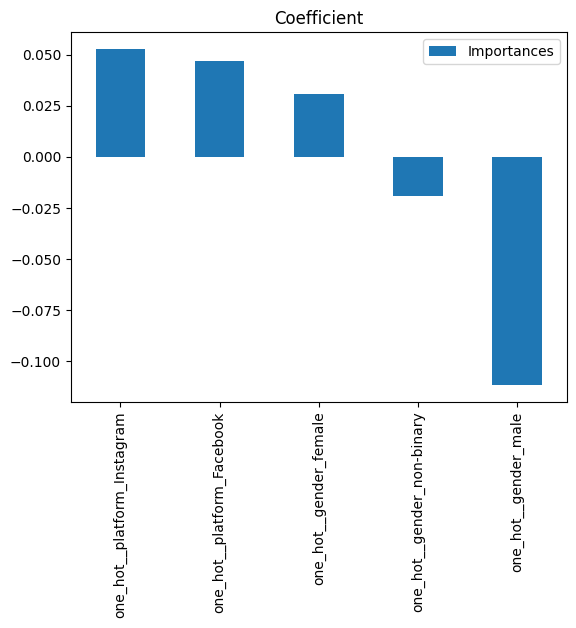

In [293]:
pd.DataFrame(lr.coef_.reshape(-1), index = preprocessor.get_feature_names_out(), columns = ["Importances"]).head().sort_values("Importances", ascending = False).plot(kind = "bar")
plt.title('Coefficient')

In [343]:
# SVC
from sklearn.svm import SVC


deg = np.logspace(-3, 2, 6)

accuracy = []
precisions = []
recalls = []

for i in deg:
  svc = SVC(kernel = "sigmoid", degree = 3, C =i, gamma = i)
  svc.fit(X_train, y_train)
  prediction = svc.predict(X_test)
  accuracy.append(accuracy_score(y_test,prediction))
  precisions.append(precision(y_test, prediction))
  recalls.append(recall(y_test, prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 1.0, 'Recall'),
 Text(0.5, 0, 'Tol and Gamma'),
 Text(0, 0.5, 'Recall')]

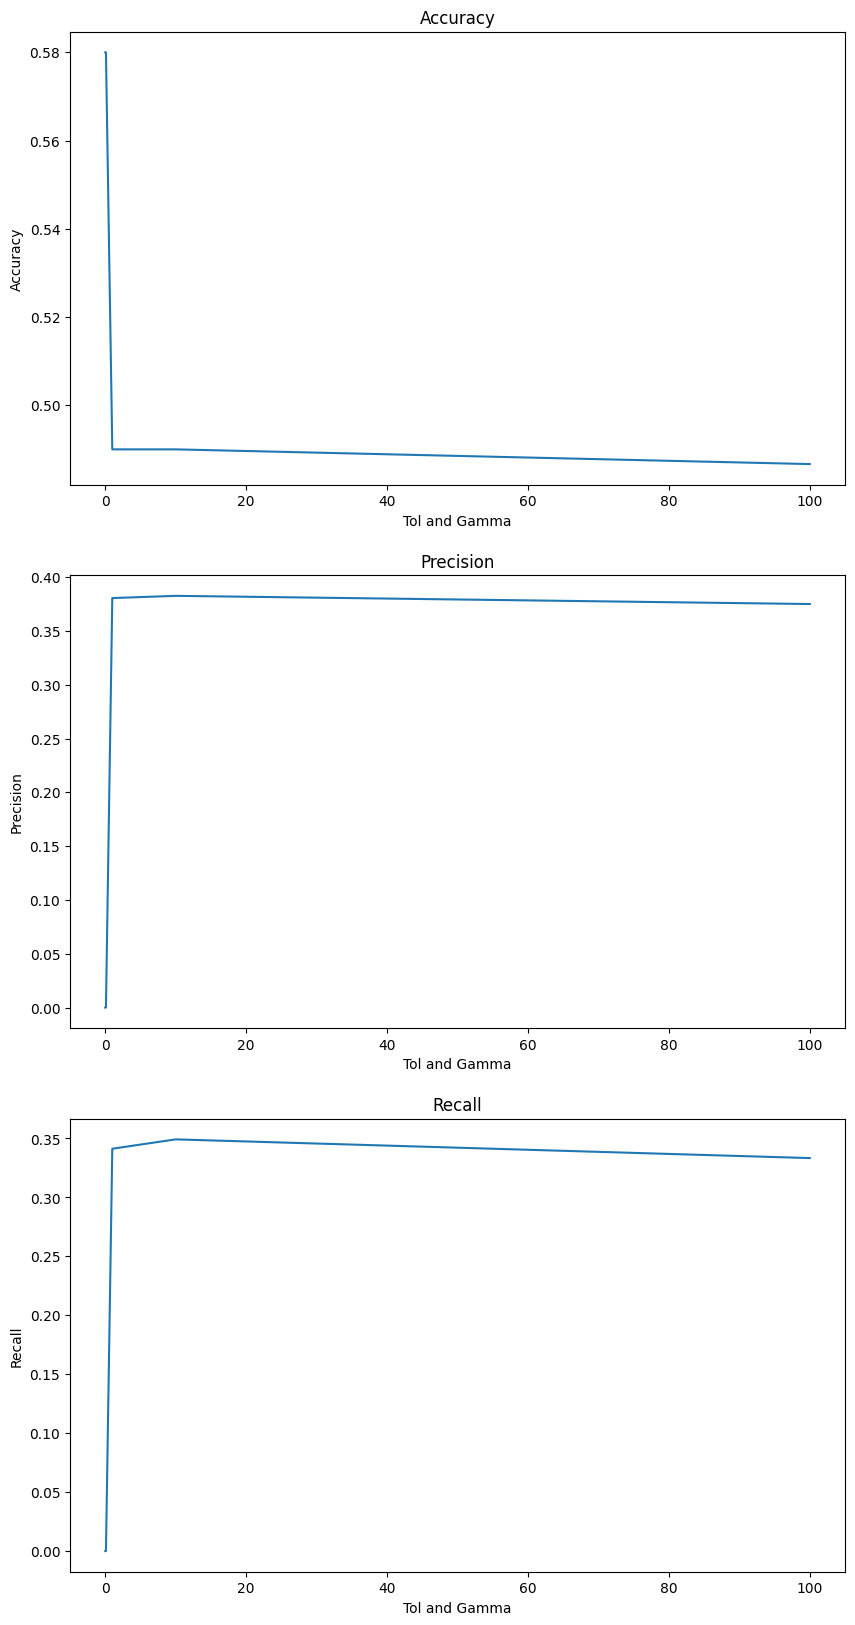

In [344]:
fig, axes =plt.subplots(3,1, figsize= (10, 20), dpi = 100)
axes[0].plot(deg, accuracy)
axes[0].set(title = "Accuracy", xlabel = "Tol and Gamma", ylabel = 'Accuracy')

axes[1].plot(deg, precisions)
axes[1].set(title = "Precision", xlabel = "Tol and Gamma", ylabel = 'Precision')

axes[2].plot(deg, recalls)
axes[2].set(title = "Recall", xlabel = "Tol and Gamma", ylabel = 'Recall')

In [341]:
svc= SVC(kernel = "sigmoid", degree = 3)
svc.fit(X_train, y_train)

SVC(kernel='sigmoid')

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       174
           1       0.47      0.50      0.49       126

    accuracy                           0.56       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.56      0.56      0.56       300



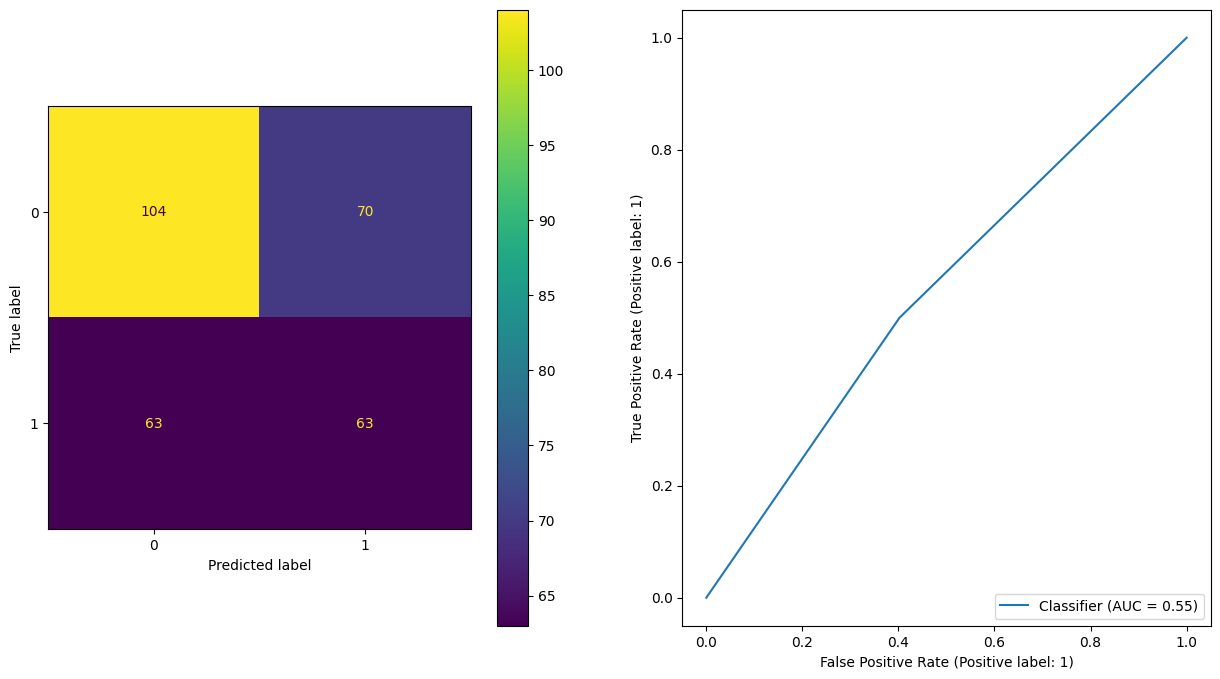

In [342]:
svc_preds = svc.predict(X_test)
print(classification_report(y_test, svc_preds))
fig, axes = plt.subplots(1,2, figsize = (15, 8))
ConfusionMatrixDisplay.from_predictions(y_test,svc_preds, ax = axes[0])
RocCurveDisplay.from_predictions(y_test,svc_preds, ax = axes[1])

In [346]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       174
           1       0.46      0.49      0.47       126

    accuracy                           0.54       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.55      0.54      0.54       300



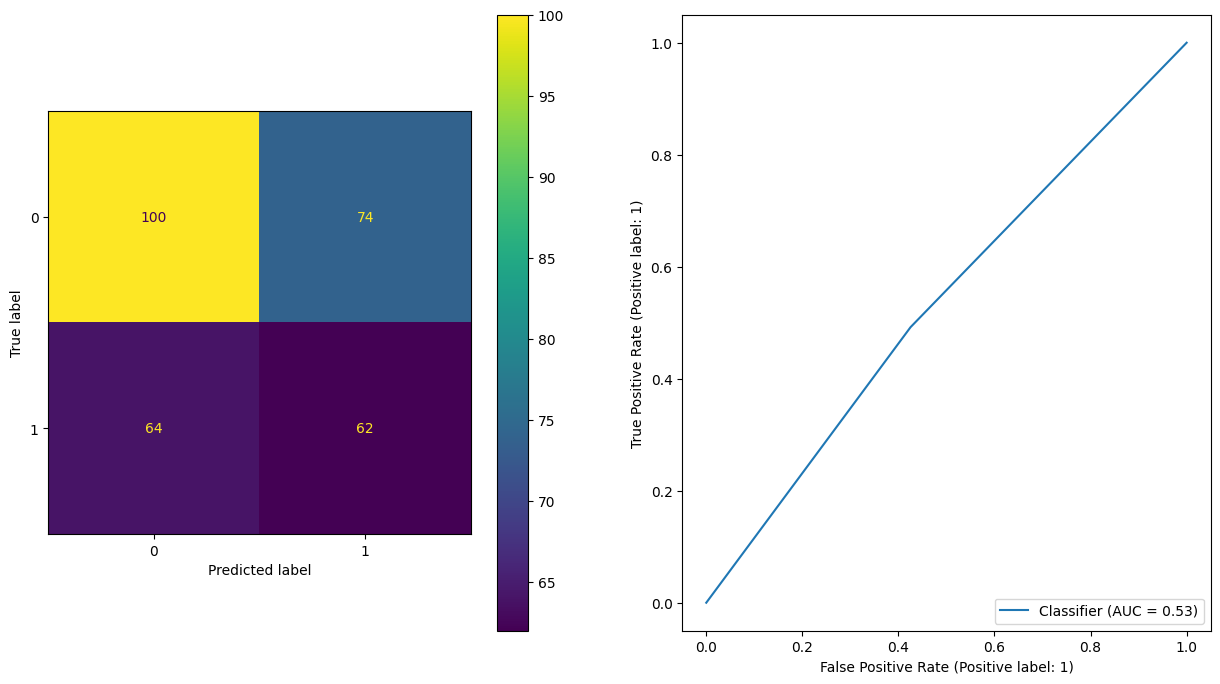

In [347]:
xgb_preds = xgb.predict(X_test)
print(classification_report(y_test, xgb_preds))
fig, axes = plt.subplots(1,2, figsize = (15, 8))
ConfusionMatrixDisplay.from_predictions(y_test,xgb_preds, ax = axes[0])
RocCurveDisplay.from_predictions(y_test,xgb_preds, ax = axes[1])

In [357]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

smoothing = np.logspace(0, -9, 30)

accuracy = []
precisions = []
recalls = []
for i in smoothing:
  gnb = GaussianNB(var_smoothing = i)
  gnb.fit(X_train, y_train)
  prediction = gnb.predict(X_test)
  accuracy.append(accuracy_score(y_test,prediction))
  precisions.append(precision(y_test, prediction))
  recalls.append(recall(y_test, prediction))

[Text(0.5, 1.0, 'Recall'), Text(0.5, 0, 'Smoothing'), Text(0, 0.5, 'Recall')]

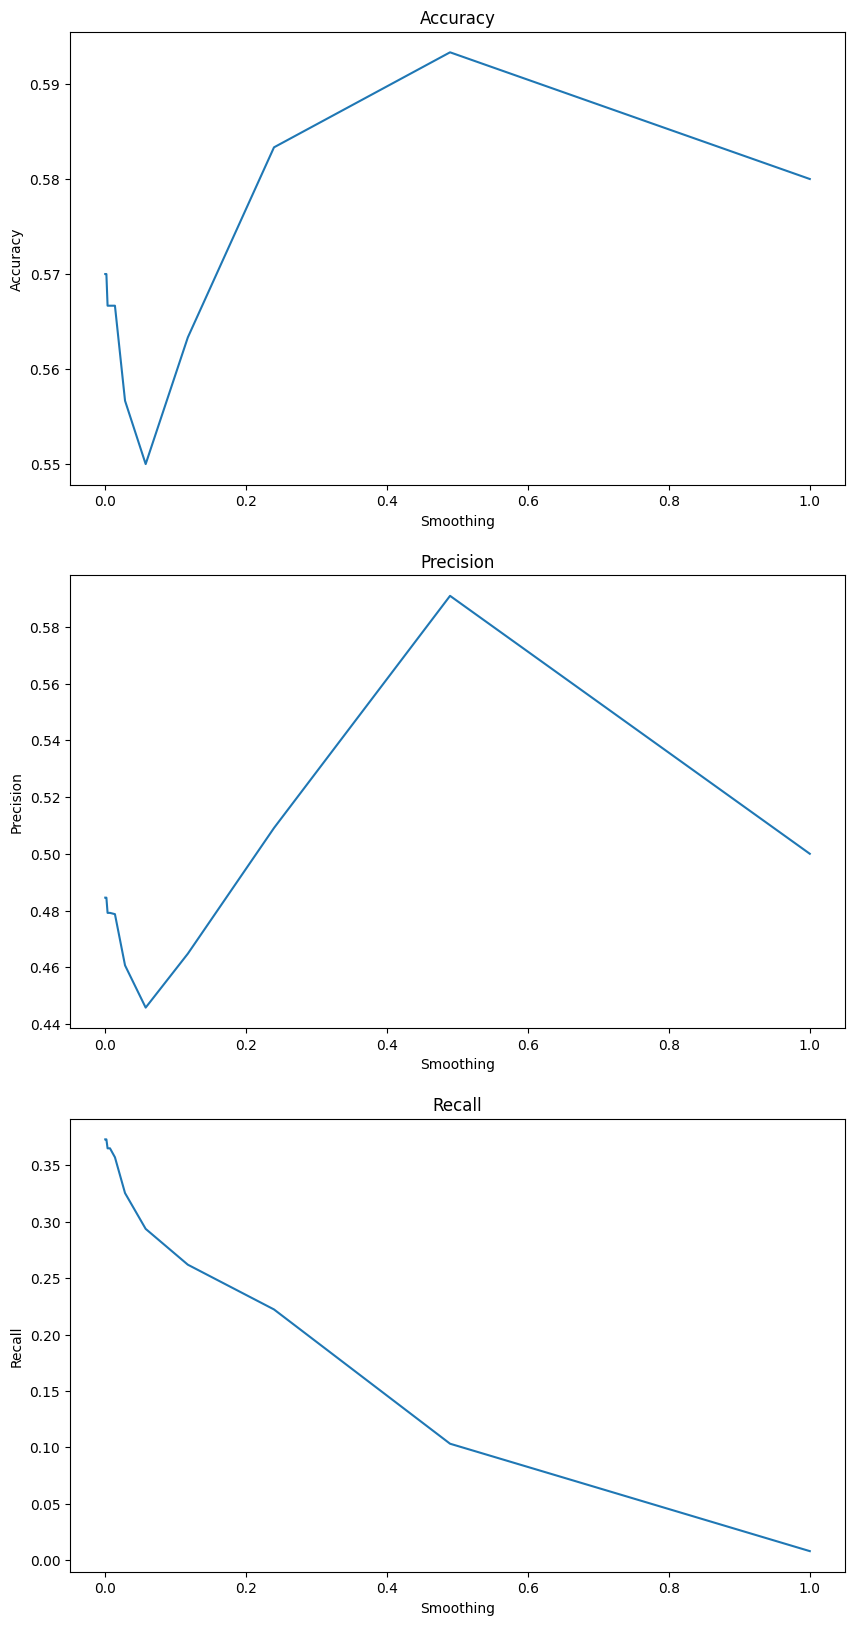

In [360]:
fig, axes =plt.subplots(3,1, figsize= (10, 20), dpi = 100)
axes[0].plot(smoothing, accuracy)
axes[0].set(title = "Accuracy", xlabel = "Smoothing", ylabel = 'Accuracy')

axes[1].plot(smoothing, precisions)
axes[1].set(title = "Precision", xlabel = "Smoothing", ylabel = 'Precision')

axes[2].plot(smoothing, recalls)
axes[2].set(title = "Recall", xlabel = "Smoothing", ylabel = 'Recall')

In [368]:
gnb =GaussianNB(var_smoothing = smoothing[np.argmax(accuracy)])
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.48939009184774934)

              precision    recall  f1-score   support

           0       0.59      0.95      0.73       174
           1       0.59      0.10      0.18       126

    accuracy                           0.59       300
   macro avg       0.59      0.53      0.45       300
weighted avg       0.59      0.59      0.50       300



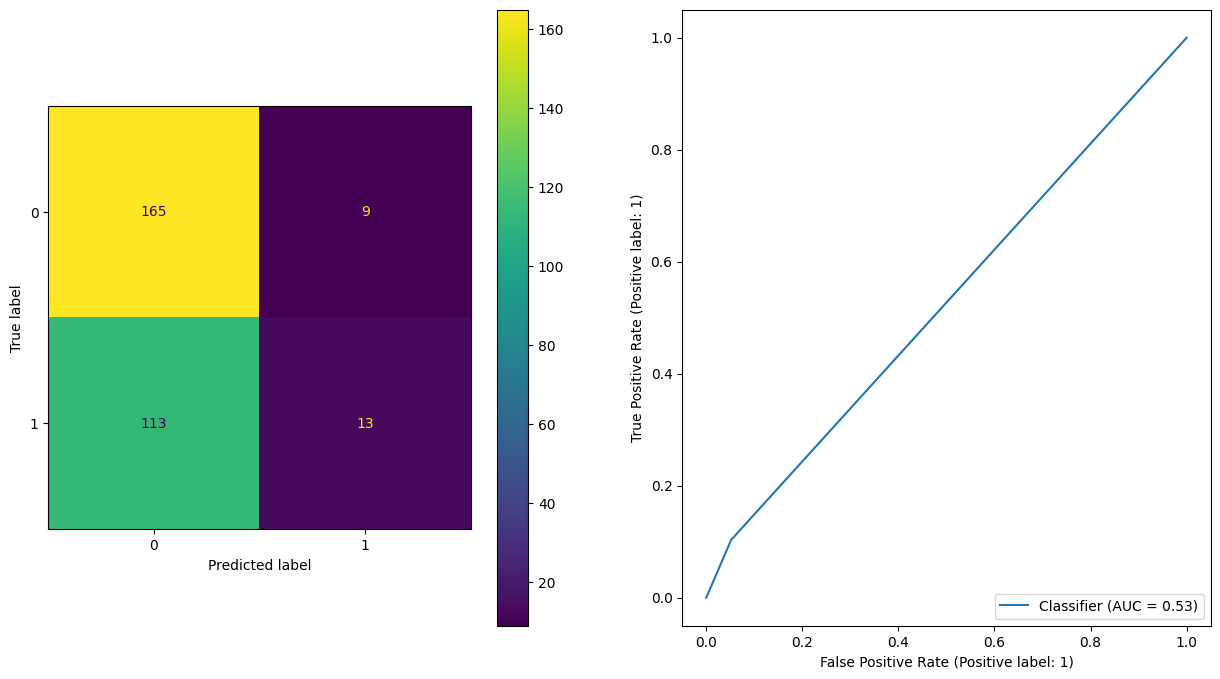

In [369]:
gnb_preds = gnb.predict(X_test)
print(classification_report(y_test, gnb_preds))
fig, axes = plt.subplots(1,2, figsize = (15, 8))
ConfusionMatrixDisplay.from_predictions(y_test,gnb_preds, ax = axes[0])
RocCurveDisplay.from_predictions(y_test,gnb_preds, ax = axes[1])

In [374]:
#KNN is the most balanced and got the higest accuracy in terms of prediction

# Tuning KNN
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1,30),  # Try different values of k
    'weights': ['uniform', 'distance'],  # Try uniform and distance weights
    'metric': ['euclidean', 'manhattan']  # Try different distance metrics
}

knn_tuned = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, cv = 10,  n_jobs = -1)
knn_tuned.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']})

In [378]:
final_model = knn_tuned.best_estimator_
final_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=23)

              precision    recall  f1-score   support

           0       0.60      0.71      0.65       174
           1       0.47      0.36      0.41       126

    accuracy                           0.56       300
   macro avg       0.54      0.53      0.53       300
weighted avg       0.55      0.56      0.55       300



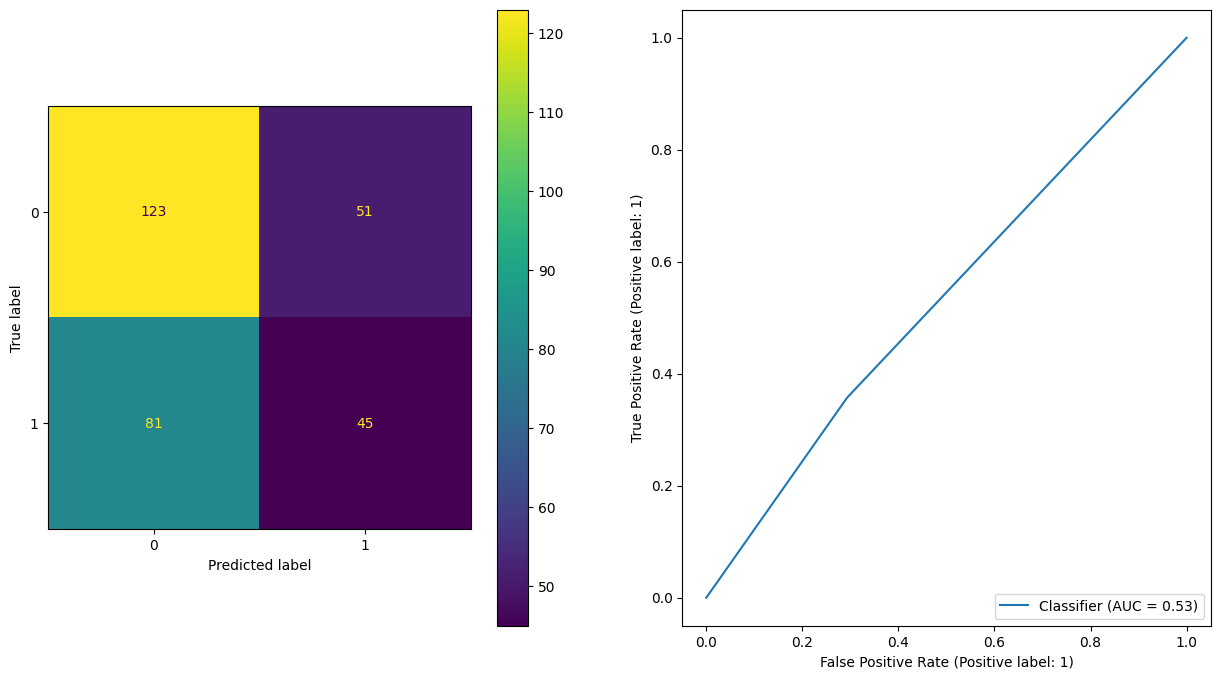

In [379]:
final_prediction = final_model.predict(X_test)
print(classification_report(y_test, final_prediction))
fig, axes = plt.subplots(1,2, figsize = (15, 8))
ConfusionMatrixDisplay.from_predictions(y_test,final_prediction, ax = axes[0])
RocCurveDisplay.from_predictions(y_test,final_prediction, ax = axes[1])

In [381]:
# Not A lot of improvements

final_pipe = Pipeline([("preprocessor", preprocessor), ("model", final_model)])
final_pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['gender', 'platform', 'interests', 'location', 'demographics',
       'profession'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['indebt', 'isHomeOwner', 'Owns_Car'], dtype='object')),
                                                 ('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'income'])])),
                ('model',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=23))])

In [400]:
# Prediction
test1 = pd.DataFrame([
    [23, "male", "Facebook", "Sports", "United Kingdom", "Sub_Urban", "Software Engineer", 50000, False, False, False]
], columns =df.drop("target", axis = 1).columns)

labels = ["Spent less than 5 Hours", "Spent More than 5 Hours"]
print(f"Test 1: {labels[final_pipe.predict(test1)[0]]}")

test2 = pd.DataFrame([
    [23, "female", "Instagram", "Lifestlye", "United Kingdom", "Rural", "Marketer Manager", 19000, False, True, False]
], columns =df.drop("target", axis = 1).columns)
print(f"Test 2: {labels[final_pipe.predict(test2)[0]]}")

Test 1: Spent less than 5 Hours
Test 2: Spent More than 5 Hours
